In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/HR Data.csv')

# Drop constant columns
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Check for nulls
print("Missing values:\n", df.isnull().sum())

# View cleaned data
df.head()


Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Total Employees
print("Total Employees:", len(df))

# Basic Stats
print("\nBasic Statistics:\n", df.describe())

# Attrition Rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("\nAttrition Rate (%):\n", attrition_rate)

# Department-wise Average Age & Income
print("\nAverage Age & Income by Department:\n", df.groupby('Department')[['Age', 'MonthlyIncome']].mean())

# Job Role-wise Job Satisfaction
print("\nJob Satisfaction by Job Role:\n", df.groupby('JobRole')['JobSatisfaction'].mean())

# Gender-wise Attrition
print("\nGender-wise Attrition:\n", pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100)

# Overtime vs Attrition
print("\nAttrition by Overtime:\n", pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100)

# Environment Satisfaction vs Attrition
print("\nEnvironment Satisfaction vs Attrition:\n", df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100)


Total Employees: 1470

Basic Statistics:
                Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


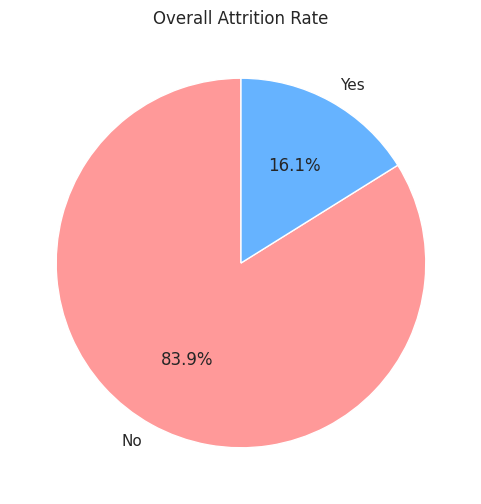

In [4]:
# Pie chart of Attrition
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Overall Attrition Rate")
plt.show()


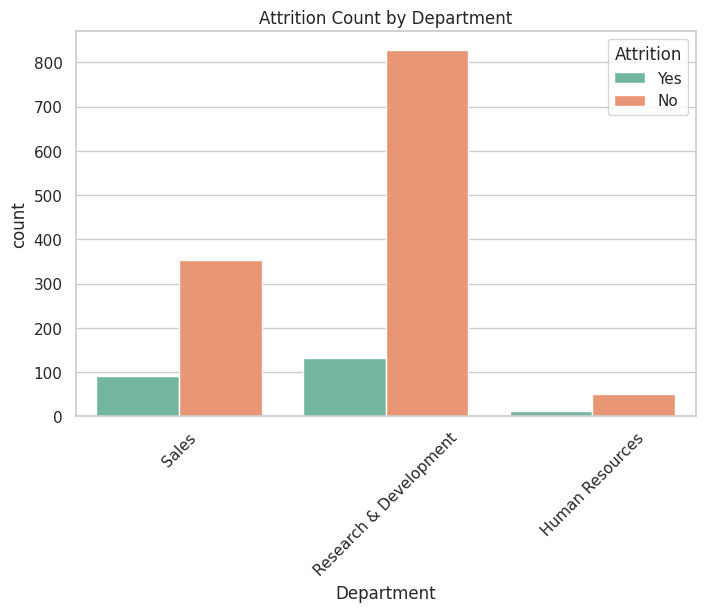

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
plt.title("Attrition Count by Department")
plt.xticks(rotation=45)
plt.show()


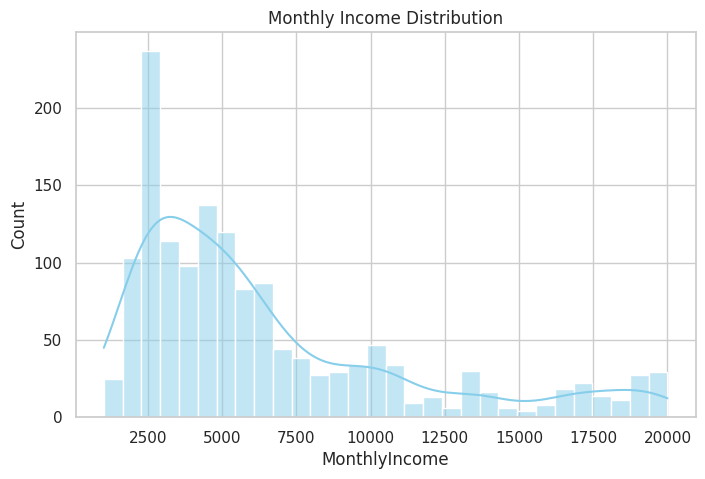

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='skyblue')
plt.title("Monthly Income Distribution")
plt.show()


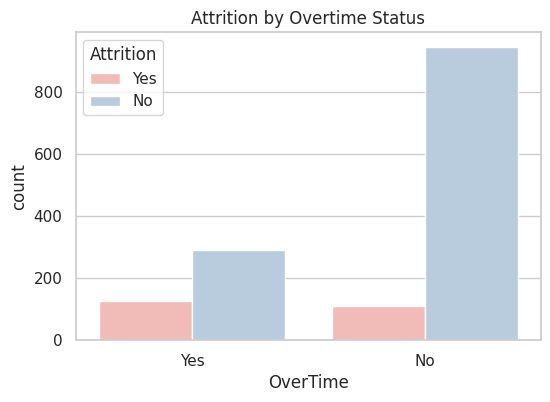

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Pastel1')
plt.title("Attrition by Overtime Status")
plt.show()


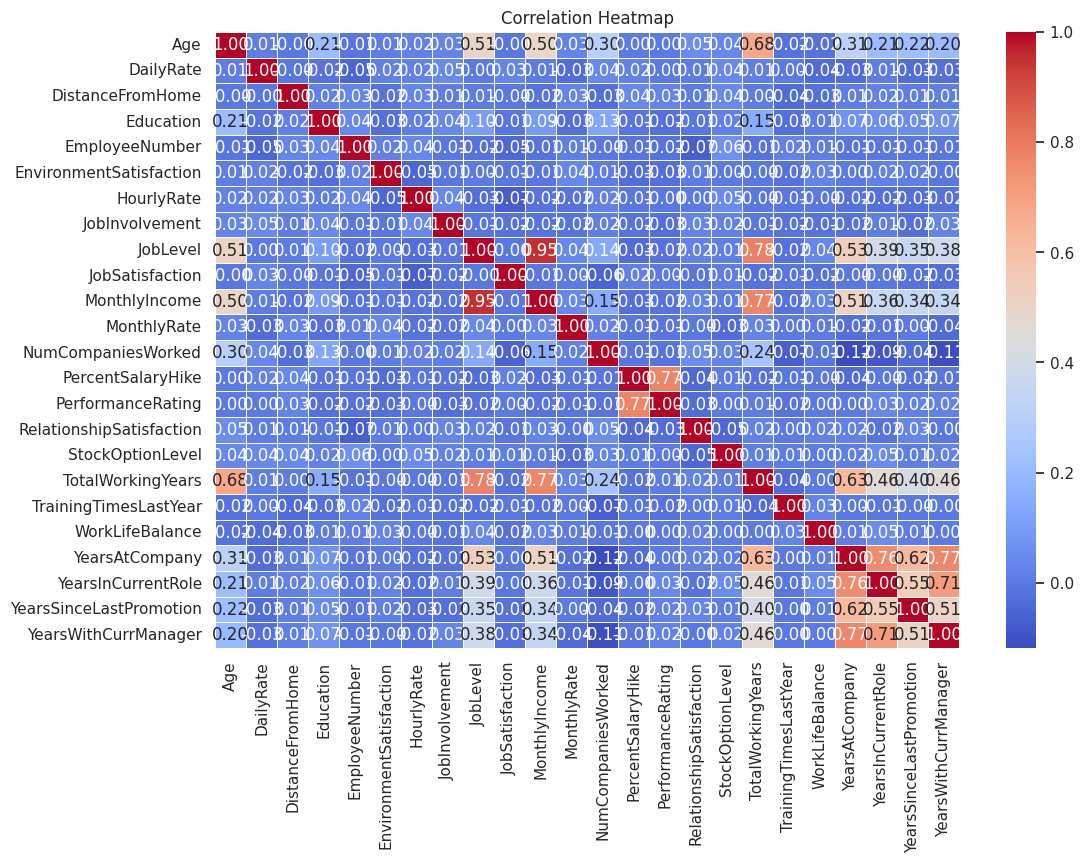

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


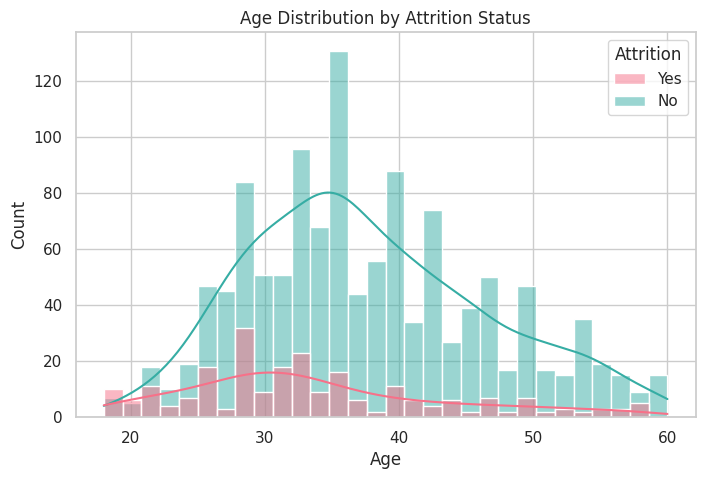

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, palette='husl', bins=30)
plt.title("Age Distribution by Attrition Status")
plt.show()


<ipython-input-10-856f47d8bb13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')


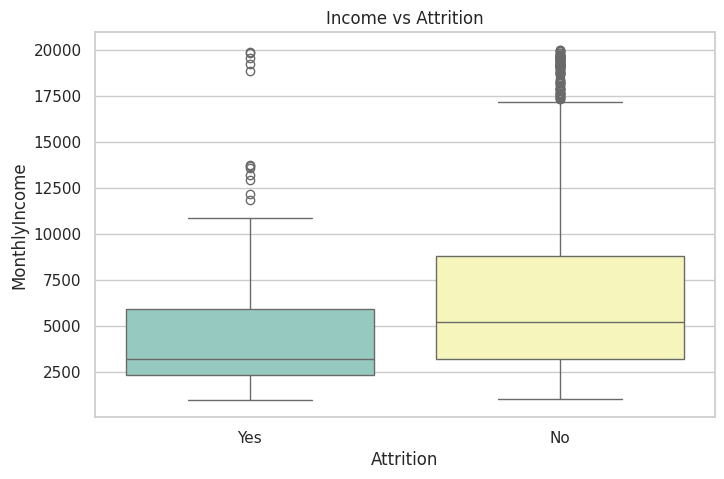

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title("Income vs Attrition")
plt.show()


<ipython-input-11-13f0c6a7a980>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='JobLevel', y='MonthlyIncome', palette='viridis')


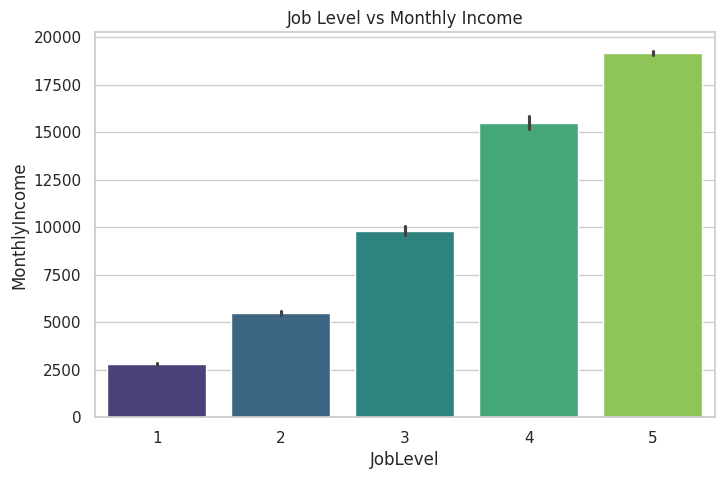

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='JobLevel', y='MonthlyIncome', palette='viridis')
plt.title("Job Level vs Monthly Income")
plt.show()


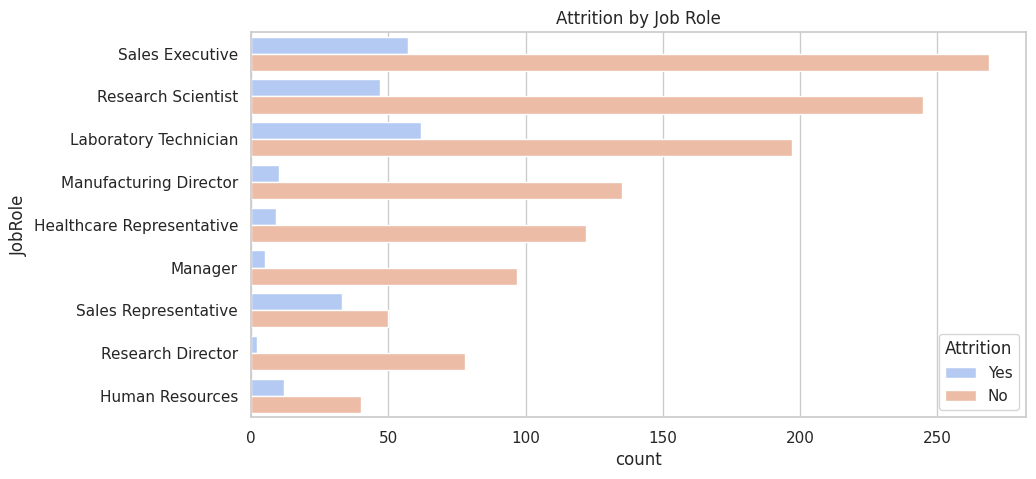

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='JobRole', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Job Role")
plt.show()


<ipython-input-13-c875b5690db8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', palette='Pastel2')


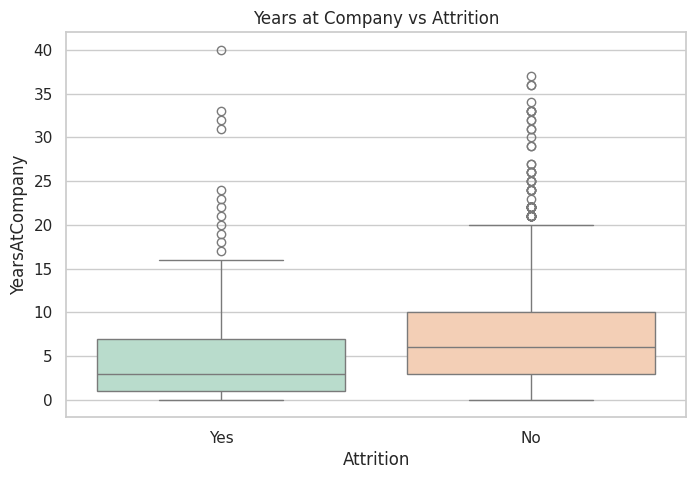

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', palette='Pastel2')
plt.title("Years at Company vs Attrition")
plt.show()


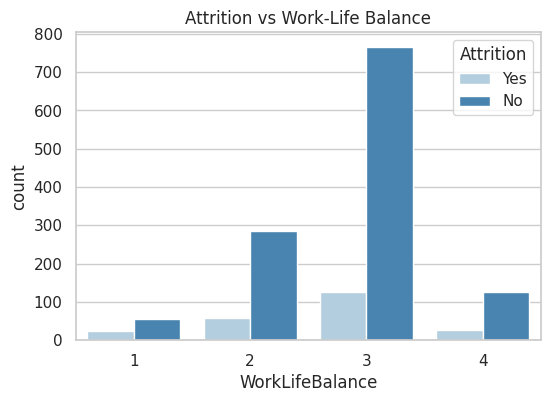

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='Blues')
plt.title("Attrition vs Work-Life Balance")
plt.show()
